### Задание

1. Проведите эксплоративный анализ данных на данных недвижимости Бостона.
2. Попытайтесь обучить линейную модель наиболее качественно.

Все ваши действия и решения описывайте в markdown.

Загружаем датасет. Переменная, которую надо предсказать - ’MEDV’.

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
data = pd.read_csv(load_boston()['filename'], skiprows=1)


In [2]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

parameters = {
    'axes.labelsize':  14,
    'figure.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'axes.titlesize': 16,
    'legend.fontsize': 12,
    'legend.title_fontsize': 14
}
plt.rcParams.update(parameters)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


В данных отсутствуют пропуски, все столбцы в числовых типов.

Неглядя на данные построим простую модель линейной регрессии. МAE для неё будем считать базовым уровнем работы моделей, выше которого попробуем подняться.

In [6]:
def linear_regression_error(data=data, use_valid=False):
    data_columns_list = list(data.columns)
    target_position = data_columns_list.index('MEDV')
    del data_columns_list[target_position]
    X = data[data_columns_list]
    y = data['MEDV']

    from sklearn.model_selection import train_test_split
    from sklearn import linear_model
    from sklearn.metrics import mean_absolute_error

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=18)
    X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, random_state=18)

    lin_regr = linear_model.LinearRegression()
    lin_regr.fit(X_train, y_train)
    
    if not use_valid:
        return mean_absolute_error(y_test, lin_regr.predict(X_test))
    else:
        return mean_absolute_error(y_valid, lin_regr.predict(X_valid))
print('MAE на тестовой выборке', linear_regression_error())
print('MAE не валидационной выборке', linear_regression_error(use_valid=True))

MAE на тестовой выборке 3.4073373203025996
MAE не валидационной выборке 3.858384075795136


### Более подробный анализ данных
Поищем выбросы и странности в данных

In [7]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 0. Цена жилья
Первым делом посмотрим на распределение переменной, которую будем предсказывать.

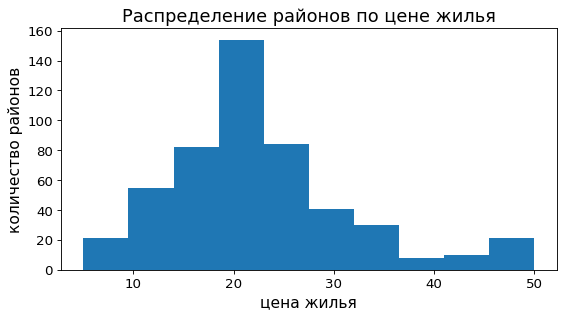

In [8]:
fig = plt.figure(figsize=(8, 4), dpi=80)
plt.title('Распределение районов по цене жилья')
_ = plt.hist(data['MEDV'])
_ = plt.xlabel("цена жилья")
_ = plt.ylabel("количество районов")

У цены бимодальное распределние, что не очень хорошо для работы линейных моделей, которые мы собираемся применять. Попробуем прологарифмировать цену жилья.

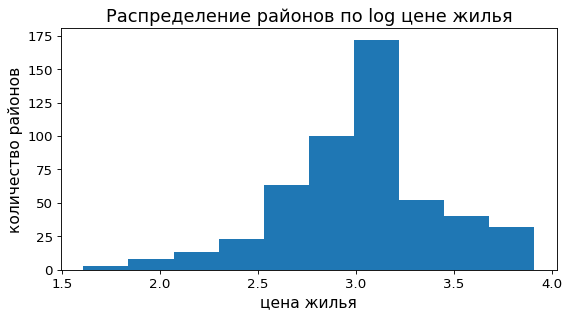

In [9]:
fig = plt.figure(figsize=(8, 4), dpi=80)
plt.title('Распределение районов по log цене жилья')
_ = plt.hist(np.log(data['MEDV']))
_ = plt.xlabel("цена жилья")
_ = plt.ylabel("количество районов")

Распределение стало ближе к нормальному.

In [10]:
def linear_regression_error(data=data, use_valid=False):
    data_columns_list = list(data.columns)
    target_position = data_columns_list.index('MEDV')
    del data_columns_list[target_position]
    X = data[data_columns_list]
    y = data['MEDV']

    from sklearn.model_selection import train_test_split
    from sklearn import linear_model
    from sklearn.metrics import mean_absolute_error

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=18)
    X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, random_state=18)

    lin_regr = linear_model.LinearRegression()
    lin_regr.fit(X_train, np.log(y_train))
    
    if not use_valid:
        return mean_absolute_error(y_test, np.exp(lin_regr.predict(X_test)))
    else:
        return mean_absolute_error(y_valid, np.exp(lin_regr.predict(X_valid)))
print('MAE на тестовой выборке', linear_regression_error())

MAE на тестовой выборке 3.0736089258910635


Предсказывать логарифм цены жилья оказывается более надёжно. Далее будем пытаться предсказать именно логарифм цены жилья.

Первым же шагом мы улучшили предсказательную силу модели на 10%. Посмотрим, как можно ещё улучшить этот показатель.

In [11]:
3.07/3.4*100

90.29411764705883

### 1. Уровень криминала (CRIM)

In [12]:
data['CRIM'].describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677082
max       88.976200
Name: CRIM, dtype: float64

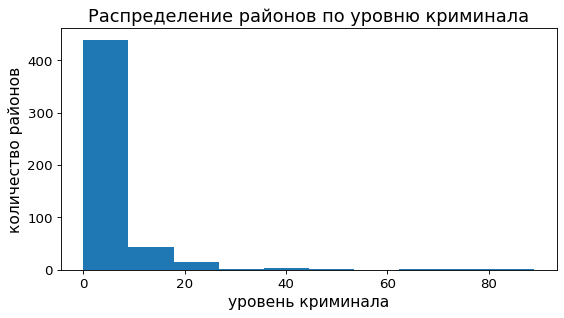

In [13]:
fig = plt.figure(figsize=(8, 4), dpi=80)
plt.title('Распределение районов по уровню криминала')
_ = plt.hist(data['CRIM'])
_ = plt.xlabel("уровень криминала")
_ = plt.ylabel("количество районов")

Очень скошенное распределение. Попробуем логорифмировать. Возможно, что на более низких уровнях криминал оказывает большее влияние на цену жилья, чем на больших.

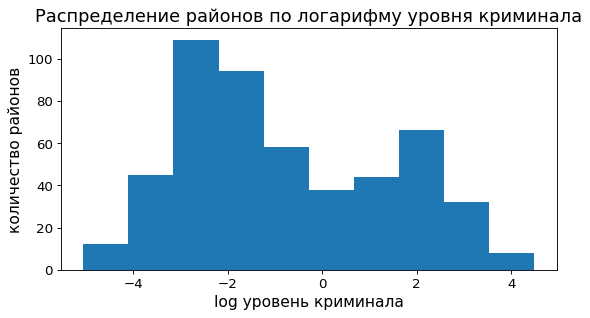

In [14]:
fig = plt.figure(figsize=(8, 4), dpi=80)
plt.title('Распределение районов по логарифму уровня криминала')
_ = plt.hist(np.log(data['CRIM']))
_ = plt.xlabel("log уровень криминала")
_ = plt.ylabel("количество районов")

Влияние уровня криминала на медианную стоимость жилья:

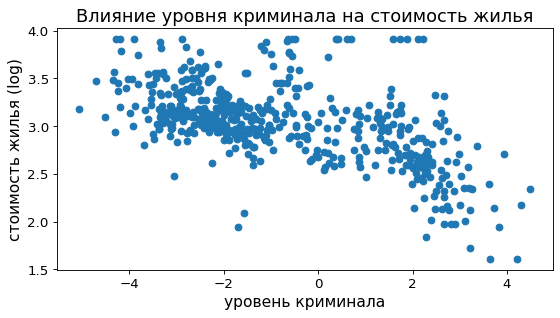

In [15]:
fig = plt.figure(figsize=(8, 4), dpi=80)
plt.title('Влияние уровня криминала на стоимость жилья')
_ = plt.scatter(np.log(data['CRIM']), np.log(data['MEDV']))
_ = plt.xlabel("уровень криминала")
_ = plt.ylabel("стоимость жилья (log)")

То же, но после логарифмирования.

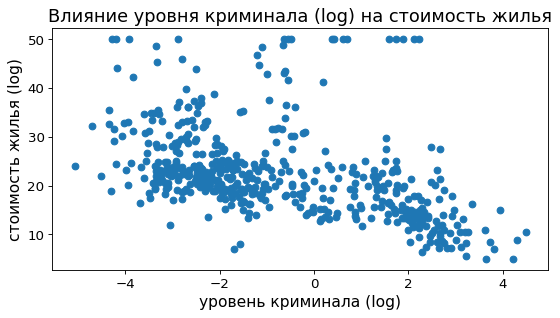

In [16]:
fig = plt.figure(figsize=(8, 4), dpi=80)
plt.title('Влияние уровня криминала (log) на стоимость жилья')
_ = plt.scatter(np.log(data['CRIM']), data['MEDV'])
_ = plt.xlabel("уровень криминала (log)")
_ = plt.ylabel("стоимость жилья (log)")

После логарифмирования связь между криминалом и стоимостью стала более линейной. Но большее количество точек стали похожи на выбросы.

In [17]:
data1 = data.copy()
data1['CRIM'] = np.log(data1['CRIM'])

linear_regression_error(data1)

3.287617173740251

При логарифмировании уровня криминала точнось модели падает.

In [18]:
data1 = data.copy()
data1['CRIM'] = data1['CRIM']
del data1['CRIM']
linear_regression_error(data1)

3.1726665828721976

После удаления информации об уровне криминала качество модели ухудшается. С криминалом оставим всё, как есть.

### 2. Доля земель, отведённых под парковки

In [19]:
data['ZN'].describe()

count    506.000000
mean      11.363636
std       23.322453
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: ZN, dtype: float64

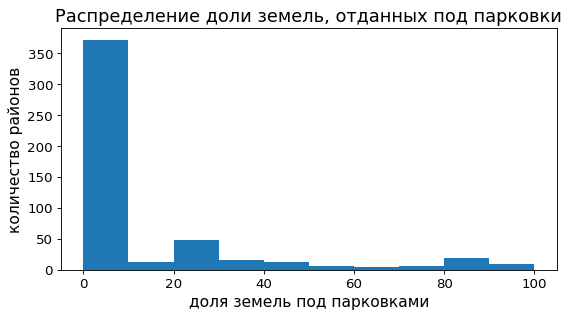

In [20]:
fig = plt.figure(figsize=(8, 4), dpi=80)
plt.title('Распределение доли земель, отданных под парковки')
_ = plt.hist(data['ZN'])
_ = plt.xlabel("доля земель под парковками")
_ = plt.ylabel("количество районов")

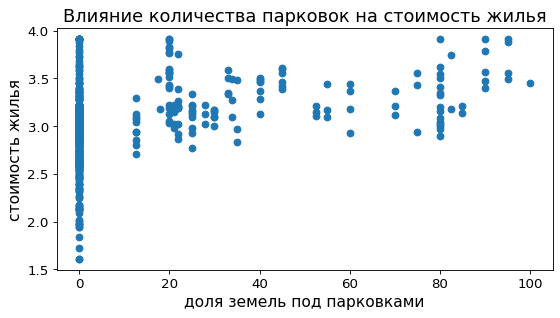

In [21]:
fig = plt.figure(figsize=(8, 4), dpi=80)
plt.title('Влияние количества парковок на стоимость жилья')
_ = plt.scatter(data['ZN'], np.log(data['MEDV']))
_ = plt.xlabel("доля земель под парковками")
_ = plt.ylabel("стоимость жилья")

Прослеживается очень слабая зависимсоть между количеством парковок и ценой жилья.

In [22]:
sum(data['ZN'] == 0)

372

Более, чем у половины всех городов нет парковок. Попробуем сделать отдельным признаком отсутствие парковки.

In [23]:
data1 = data.copy()

data1['ZN0'] = (data['ZN'] == 0).astype('int')
data1['ZN'] = data1['ZN']
linear_regression_error(data1)

3.109231716059019

Ошибка немного выросла. Похоже, это была не лучшая идея.

### 3. Доля земель, отведённых под бизнес

In [24]:
data['INDUS'].describe()

count    506.000000
mean      11.136779
std        6.860353
min        0.460000
25%        5.190000
50%        9.690000
75%       18.100000
max       27.740000
Name: INDUS, dtype: float64

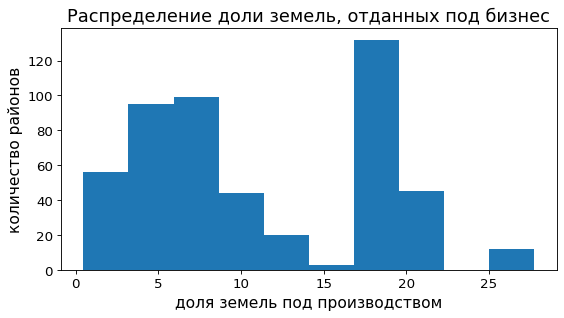

In [25]:
fig = plt.figure(figsize=(8, 4), dpi=80)
plt.title('Распределение доли земель, отданных под бизнес')
_ = plt.hist(data['INDUS'])
_ = plt.xlabel("доля земель под производством")
_ = plt.ylabel("количество районов")

Распределение данных немного скошено вправо. Возможно, если извлечь квадратный или кубический корень из этой переменной можно немного улучшить качество модели.

In [26]:
data1 = data.copy()
data1['INDUS'] = np.sqrt(data1['INDUS'])
linear_regression_error(data1)

3.0644057528436135

Качество модели улучшилось, но совсем немного. Возможно, что на валидирующей выборке этот приём не даст прибавки к качеству.

Но мы также можем попробовать не извлекать корень из INDUS, а добавить новую фичу равную корню из INDUS.

In [27]:
data1 = data.copy()
data1['INDUS1'] = np.sqrt(data1['INDUS'])
linear_regression_error(data1)

2.9716443363270213

На этот раз выигрыш более очевидный. Попробуем поиграть со степенью корня.

In [28]:
data1 = data.copy()
data1['INDUS1'] = data1['INDUS']**0.4
linear_regression_error(data1)

2.9699799203024315

In [29]:
data1 = data.copy()
data1['INDUS1'] = data1['INDUS']**0.33
linear_regression_error(data1)

2.968986065365157

In [30]:
data1 = data.copy()
data1['INDUS1'] = data1['INDUS']**0.25
linear_regression_error(data1)

2.9680553823477376

In [31]:
data1 = data.copy()
data1['INDUS1'] = data1['INDUS']**0.1
linear_regression_error(data1)

2.9670666917198756

Иземнение степени корня не оказывает существенного влияния на точность модели. Остановимся на изначальном варианте с квадратным корнем.

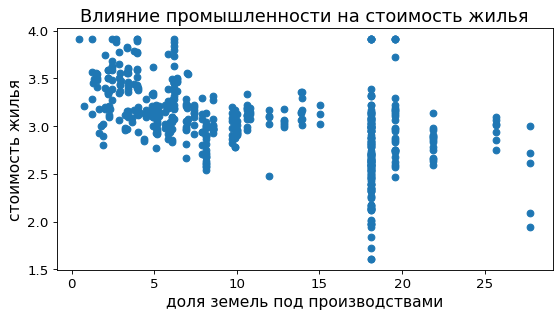

In [32]:
fig = plt.figure(figsize=(8, 4), dpi=80)
plt.title('Влияние промышленности на стоимость жилья')
_ = plt.scatter(data['INDUS'], np.log(data['MEDV']))
_ = plt.xlabel("доля земель под производствами")
_ = plt.ylabel("стоимость жилья")

Форма зависимости не очень линейна. Возможно, добавление некоторой полиномиальной фичи на базе INDUS позволит улучшить модель.

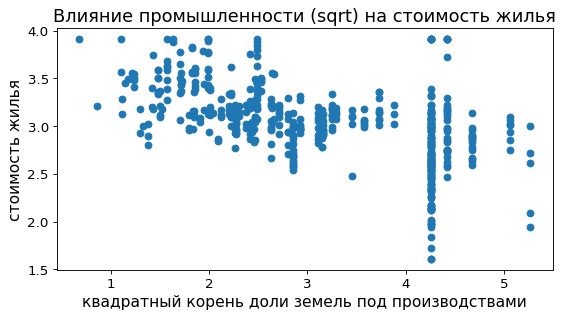

In [33]:
fig = plt.figure(figsize=(8, 4), dpi=80)
plt.title('Влияние промышленности (sqrt) на стоимость жилья')
_ = plt.scatter(data['INDUS']**0.5, np.log(data['MEDV']))
_ = plt.xlabel("квадратный корень доли земель под производствами")
_ = plt.ylabel("стоимость жилья")

Извлечение корня из доли земель под бизнесом деляет влияние этой переменной на стоимость жилья более линейной.

### 4. Соседство с рекой

In [34]:
data['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

Большинство районов не граничат с рекой. Возможно, этот признак только вносит шум в данные.

In [35]:
data1 = data.copy()
data1['INDUS1'] = np.sqrt(data1['INDUS'])
del data1['CHAS']
linear_regression_error(data1)

2.821113181519683

Удаление столбца с данным о соседстве с рекой улучшает качество модели. Значит, эти данные не важны для работы модели.

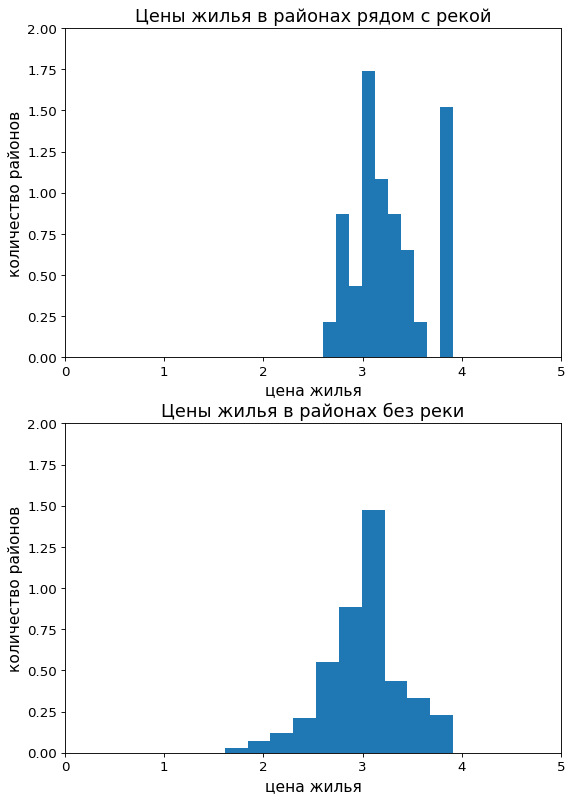

In [36]:
with_river = data[data['CHAS'] == 1]['MEDV']
without_river = data[data['CHAS'] == 0]['MEDV']

fig = plt.figure(figsize=(8, 12), dpi=80)

plt.subplot(211)
plt.title('Цены жилья в районах рядом с рекой')
_ = plt.hist(np.log(with_river), density=True)
plt.axis([0, 5, 0, 2])
_ = plt.xlabel("цена жилья")
_ = plt.ylabel("количество районов")

plt.subplot(212)
plt.title('Цены жилья в районах без реки')
_ = plt.hist(np.log(without_river), density=True)
plt.axis([0, 5, 0, 2])
_ = plt.xlabel("цена жилья")
_ = plt.ylabel("количество районов")

Распределение логарифма цены выглядит по разному в районах у реки и вдалеке от реки. Но удаление из модели информации о близости с рекой не улучшает качество модели.

### 5. Содержание оксида азота в воздухе

In [37]:
data['NOX'].describe()

count    506.000000
mean       0.554695
std        0.115878
min        0.385000
25%        0.449000
50%        0.538000
75%        0.624000
max        0.871000
Name: NOX, dtype: float64

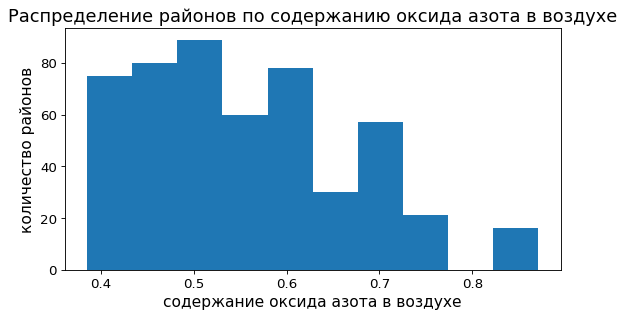

In [38]:
fig = plt.figure(figsize=(8, 4), dpi=80)
plt.title('Распределение районов по содержанию оксида азота в воздухе')
_ = plt.hist(data['NOX'])
_ = plt.xlabel("содержание оксида азота в воздухе")
_ = plt.ylabel("количество районов")

In [39]:
data1 = data.copy()
data1['INDUS1'] = np.sqrt(data1['INDUS'])
del data1['CHAS']
del data1['NOX']
linear_regression_error(data1)

2.883315738848099

Удаление этой переменной не улучшает качество модели.

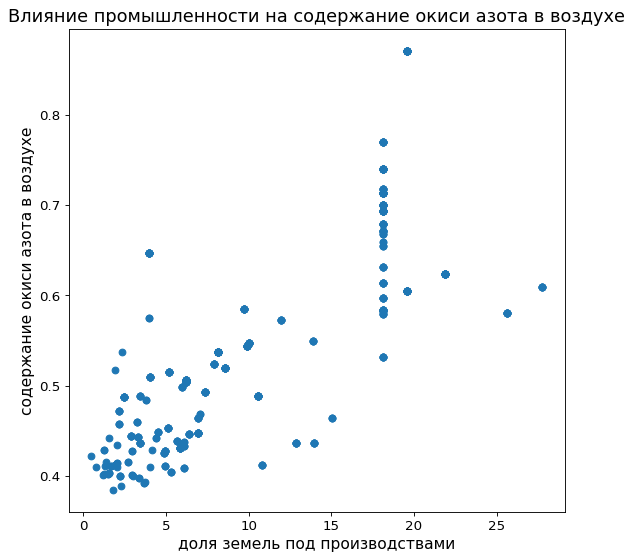

In [40]:
fig = plt.figure(figsize=(8, 8), dpi=80)
plt.title('Влияние промышленности на содержание окиси азота в воздухе')
plt.scatter(data['INDUS'], data['NOX'])
_ = plt.xlabel("доля земель под производствами")
_ = plt.ylabel("содержание окиси азота в воздухе")

Также есть отчётливая корреляция между долей земли, занятой бизнесом и уровнем оксида озота в атмосфере

У переменной NOX довольно равномерное расределение. Видимо, и без преобразований она хорошо включается в линейную регрессию.

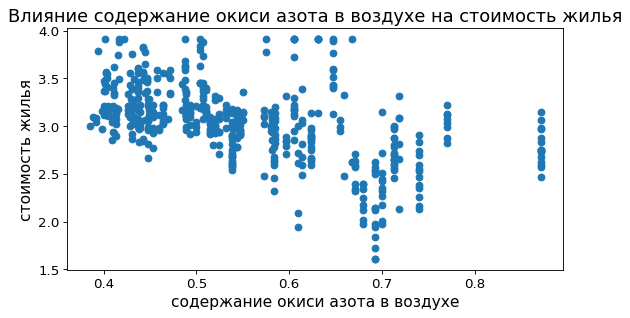

In [41]:
fig = plt.figure(figsize=(8, 4), dpi=80)
plt.title('Влияние содержание окиси азота в воздухе на стоимость жилья')
_ = plt.scatter(data['NOX'], np.log(data['MEDV']))
_ = plt.xlabel("содержание окиси азота в воздухе")
_ = plt.ylabel("стоимость жилья")

Действительно, видна связь между уровнем оксида азота в воздухе и ценой жилья. В районах с более чистым воздухом более дорогое жильё.

### 6. Среднее количество комнат в жилых домах

In [42]:
data['RM'].describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

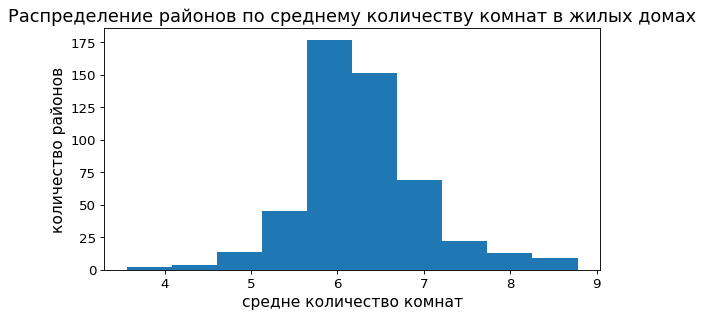

In [43]:
fig = plt.figure(figsize=(8, 4), dpi=80)
plt.title('Распределение районов по среднему количеству комнат в жилых домах')
_ = plt.hist(data['RM'])
_ = plt.xlabel("средне количество комнат")
_ = plt.ylabel("количество районов")

Красивое нормальное распределение. Без видимых выбросов.

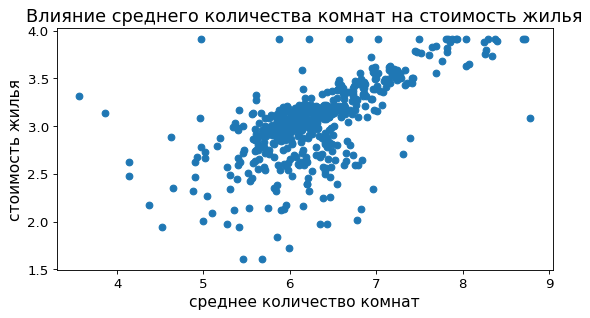

In [44]:
fig = plt.figure(figsize=(8, 4), dpi=80)
plt.title('Влияние среднего количества комнат на стоимость жилья')
_ = plt.scatter(data['RM'], np.log(data['MEDV']))
_ = plt.xlabel("среднее количество комнат")
_ = plt.ylabel("стоимость жилья")

Здесь очевидная сильная линейная связь между количеством комнат и ценой жилья.

### 7. Процент заселённых старых домов

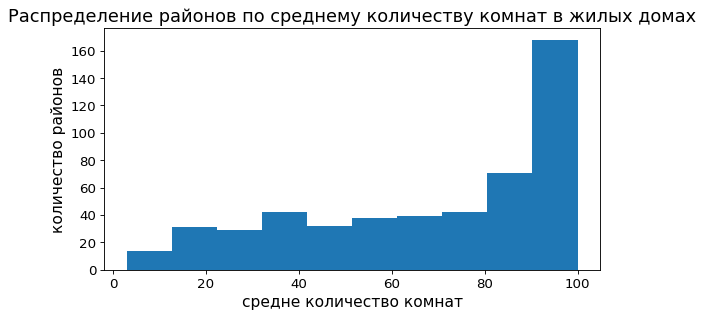

In [45]:
fig = plt.figure(figsize=(8, 4), dpi=80)
plt.title('Распределение районов по среднему количеству комнат в жилых домах')
_ = plt.hist(data['AGE'])
_ = plt.xlabel("средне количество комнат")
_ = plt.ylabel("количество районов")

In [46]:
data1 = data.copy()
data1['INDUS1'] = np.sqrt(data1['INDUS'])
del data1['CHAS']
data1['AGE'] = data1['AGE']**2
# del data1['AGE'] # = np.sqrt(data1['AGE'])
linear_regression_error(data1)

2.82549575629122

Удаление этого признака почти не улучшает качество модели.

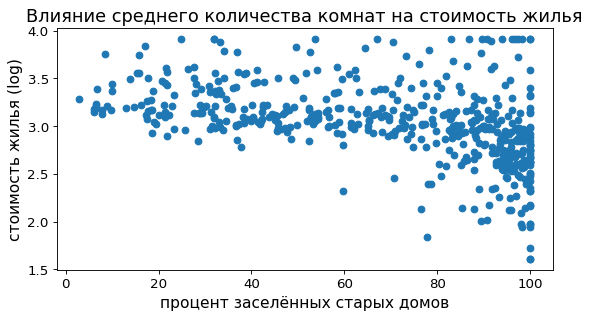

In [47]:
fig = plt.figure(figsize=(8, 4), dpi=80)
plt.title('Влияние среднего количества комнат на стоимость жилья')
_ = plt.scatter(data['AGE'], np.log(data['MEDV']))
_ = plt.xlabel("процент заселённых старых домов")
_ = plt.ylabel("стоимость жилья (log)")


Процент заселённых старых домов проявляет влияние на цену только если он очень высок. Попробуем сделать признак, который принимал бы значение 1, если data['AGE'] > 80 и ноль в обратном случае.

In [48]:
data1 = data.copy()

data1['INDUS1'] = np.sqrt(data1['INDUS'])
del data1['CHAS']
data1['AGE'] = (data1['AGE'] > 80).astype('int')

linear_regression_error(data1)

2.802554430592701

Такой подход на тренировочной выборке также не помогает заметно лучшить результат.

### 8. Расстояние до рабочих центров

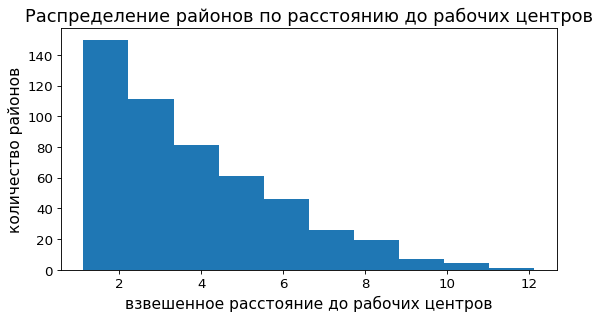

In [49]:
fig = plt.figure(figsize=(8, 4), dpi=80)
plt.title('Распределение районов по расстоянию до рабочих центров')
_ = plt.hist(data['DIS'])
_ = plt.xlabel("взвешенное расстояние до рабочих центров")
_ = plt.ylabel("количество районов")

In [50]:
data1 = data.copy()
data1['INDUS1'] = np.sqrt(data1['INDUS'])
del data1['CHAS']
del data1['AGE']
del data1['DIS']
linear_regression_error(data1)

3.193400438623378

Этот признак важен для работы модели.

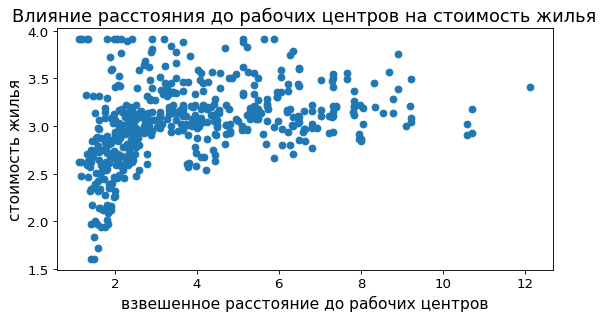

In [51]:
fig = plt.figure(figsize=(8, 4), dpi=80)
plt.title('Влияние расстояния до рабочих центров на стоимость жилья')
_ = plt.scatter(data['DIS'], np.log(data['MEDV']))
_ = plt.xlabel("взвешенное расстояние до рабочих центров")
_ = plt.ylabel("стоимость жилья")

В районах, которые близки к скоростным трассам, влияние расстояния до трассы на цену выше, чем в более удалённых от трасс районах. Логарифмирование расстояния до трассы помогает "подсветить" этот факт. 

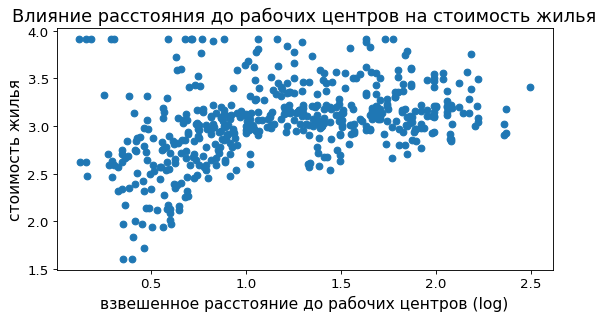

In [52]:
fig = plt.figure(figsize=(8, 4), dpi=80)
plt.title('Влияние расстояния до рабочих центров на стоимость жилья')
_ = plt.scatter(np.log(data['DIS']), np.log(data['MEDV']))
_ = plt.xlabel("взвешенное расстояние до рабочих центров (log)")
_ = plt.ylabel("стоимость жилья")

In [53]:
data1 = data.copy()
data1['INDUS1'] = np.sqrt(data1['INDUS'])
del data1['CHAS']
del data1['AGE']
data1['DIS'] = np.log(data1['DIS'])
linear_regression_error(data1)

2.7518546622614855

Близкое расстояние до рабочих центров может оказывать влияние на уровень окиси азота в воздухе.

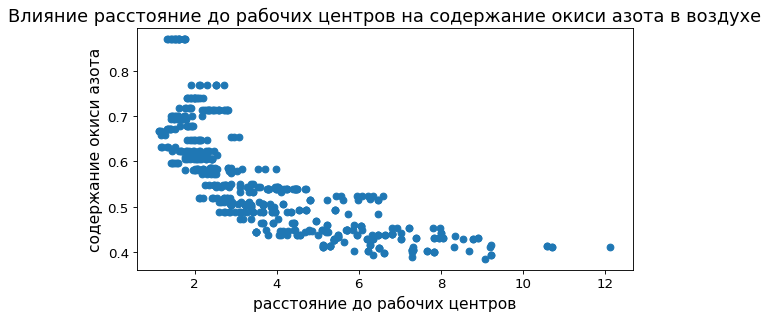

In [54]:
fig = plt.figure(figsize=(8, 4), dpi=80)
plt.title('Влияние расстояние до рабочих центров на содержание окиси азота в воздухе')
_ = plt.scatter(data['DIS'], data['NOX'])
_ = plt.xlabel("расстояние до рабочих центров")
_ = plt.ylabel("содержание окиси азота")

Для больших расстояний от рабочих центров уровень окиси азота в воздухе сильно зависит от расстояния до трасс. Но при малом расстоянии до трасс уровень окиси азота в воздухе более вариабелен, благодаря этому рассматриваемые признаки не могут заменить друг друга.

### 9. Доступность кольцевых трасс

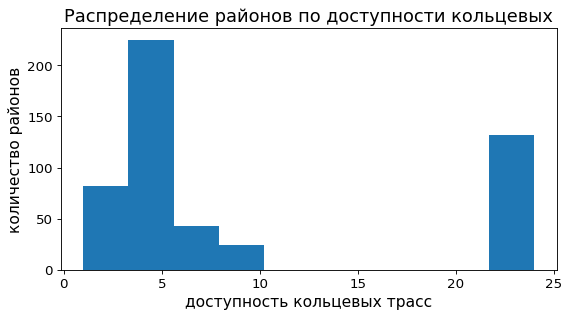

In [55]:
fig = plt.figure(figsize=(8, 4), dpi=80)
plt.title('Распределение районов по доступности кольцевых')
_ = plt.hist(data['RAD'])
_ = plt.xlabel("доступность кольцевых трасс")
_ = plt.ylabel("количество районов")

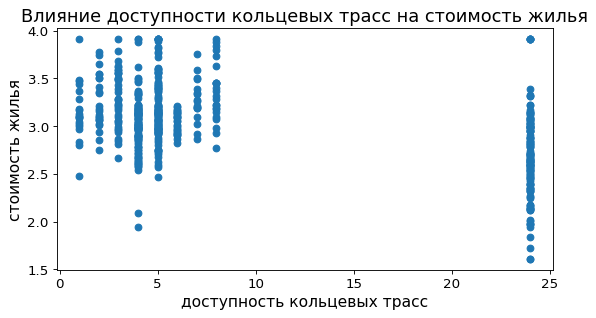

In [56]:
fig = plt.figure(figsize=(8, 4), dpi=80)
plt.title('Влияние доступности кольцевых трасс на стоимость жилья')
_ = plt.scatter(data['RAD'], np.log(data['MEDV']))
_ = plt.xlabel("доступность кольцевых трасс")
_ = plt.ylabel("стоимость жилья")

In [57]:
data1 = data.copy()
data1['INDUS1'] = np.sqrt(data1['INDUS'])
del data1['CHAS']
del data1['AGE']
data1['DIS'] = np.log(data1['DIS'])

del data1['RAD']
linear_regression_error(data1)

2.8924501631161603

Удаление информации о доступности кольцевых трасс ухудшает качество модели.

### 10. TAX

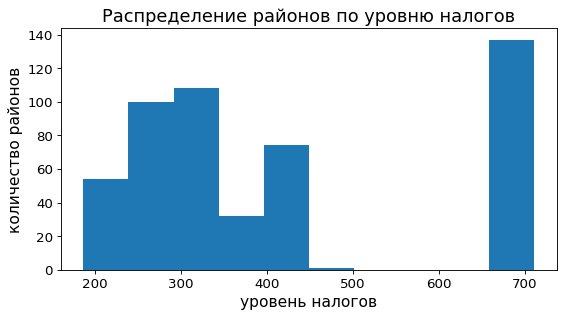

In [58]:
fig = plt.figure(figsize=(8, 4), dpi=80)
plt.title('Распределение районов по уровню налогов')
_ = plt.hist(data['TAX'])
_ = plt.xlabel("уровень налогов")
_ = plt.ylabel("количество районов")

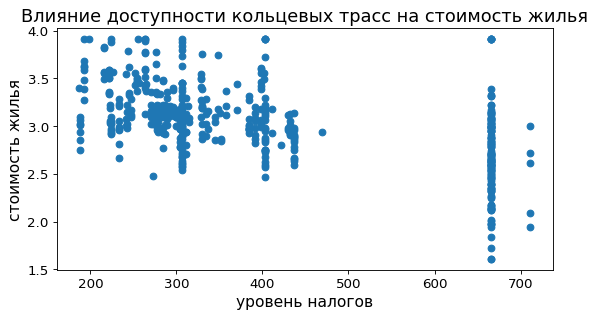

In [59]:
fig = plt.figure(figsize=(8, 4), dpi=80)
plt.title('Влияние доступности кольцевых трасс на стоимость жилья')
_ = plt.scatter(data['TAX'], np.log(data['MEDV']))
_ = plt.xlabel("уровень налогов")
_ = plt.ylabel("стоимость жилья")


Видна явная связь между уровнем налогов на районе и стомиостью жилья там же.

### 11. PTRATIO

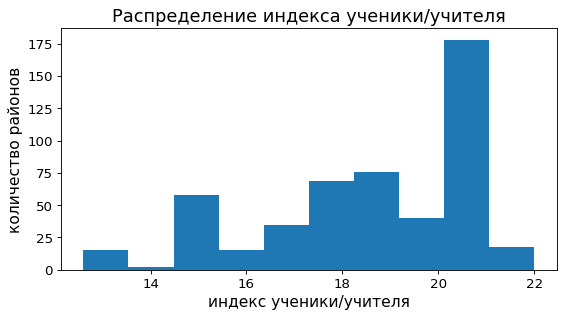

In [60]:
fig = plt.figure(figsize=(8, 4), dpi=80)
plt.title('Распределение индекса ученики/учителя')
_ = plt.hist(data['PTRATIO'])
_ = plt.xlabel("индекс ученики/учителя")
_ = plt.ylabel("количество районов")

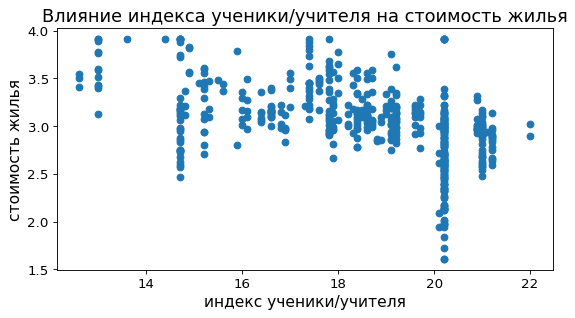

In [61]:
fig = plt.figure(figsize=(8, 4), dpi=80)
plt.title('Влияние индекса ученики/учителя на стоимость жилья')
_ = plt.scatter(data['PTRATIO'], np.log(data['MEDV']))
_ = plt.xlabel("индекс ученики/учителя")
_ = plt.ylabel("стоимость жилья")

In [62]:
data1 = data.copy()
data1['INDUS1'] = np.sqrt(data1['INDUS'])
del data1['CHAS']
del data1['AGE']
data1['DIS'] = np.log(data1['DIS'])

# del data1['PTRATIO']
linear_regression_error(data1)

2.7518546622614855

In [63]:
data1 = data.copy()
data1['INDUS1'] = np.sqrt(data1['INDUS'])
del data1['CHAS']
del data1['AGE']
data1['DIS'] = np.log(data1['DIS'])

del data1['PTRATIO']
linear_regression_error(data1)

2.8073326902381734

Рассматриваемая переменная важна для работы модели.

### 12. B

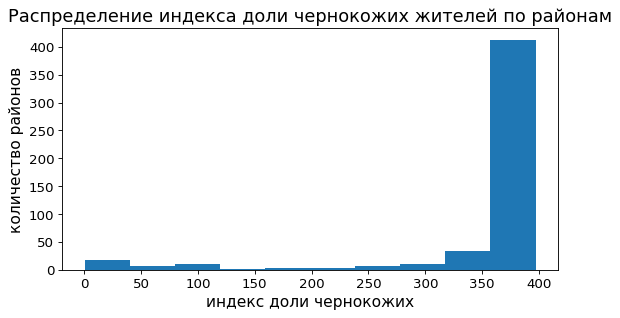

In [64]:
fig = plt.figure(figsize=(8, 4), dpi=80)
plt.title('Распределение индекса доли чернокожих жителей по районам')
_ = plt.hist(data['B'])
_ = plt.xlabel("индекс доли чернокожих")
_ = plt.ylabel("количество районов")

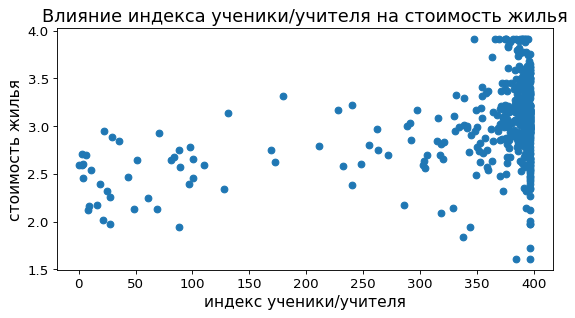

In [65]:
fig = plt.figure(figsize=(8, 4), dpi=80)
plt.title('Влияние индекса ученики/учителя на стоимость жилья')
_ = plt.scatter(data['B'], np.log(data['MEDV']))
_ = plt.xlabel("индекс ученики/учителя")
_ = plt.ylabel("стоимость жилья")

In [66]:
data1 = data.copy()
data1['INDUS1'] = np.sqrt(data1['INDUS'])
del data1['CHAS']
del data1['AGE']
data1['DIS'] = np.log(data1['DIS'])

linear_regression_error(data1)

2.7518546622614855

In [67]:
data1 = data.copy()
data1['INDUS1'] = np.sqrt(data1['INDUS'])
del data1['CHAS']
del data1['AGE']
data1['DIS'] = np.log(data1['DIS'])

del data1['B']
linear_regression_error(data1)

2.7788345492447686

Данная переменная важна для работы модели.

### 13. LSTAT

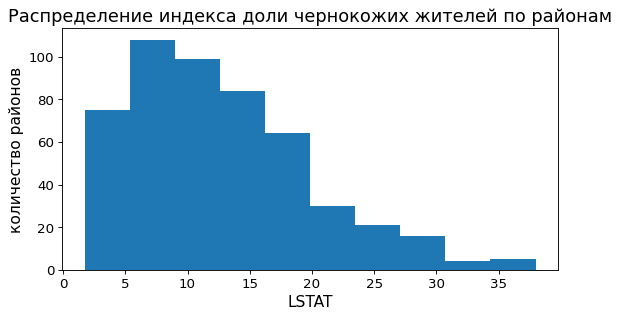

In [68]:
fig = plt.figure(figsize=(8, 4), dpi=80)
plt.title('Распределение индекса доли чернокожих жителей по районам')
_ = plt.hist(data['LSTAT'])
_ = plt.xlabel("LSTAT")
_ = plt.ylabel("количество районов")

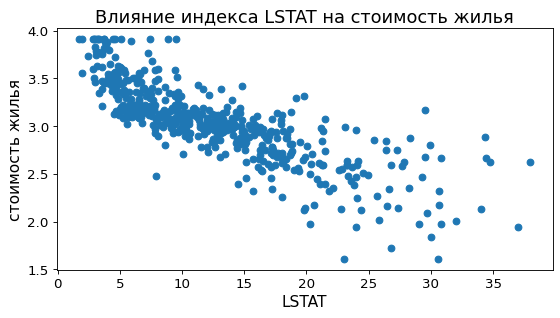

In [69]:
fig = plt.figure(figsize=(8, 4), dpi=80)
plt.title('Влияние индекса LSTAT на стоимость жилья')
_ = plt.scatter(data['LSTAT'], np.log(data['MEDV']))
_ = plt.xlabel("LSTAT")
_ = plt.ylabel("стоимость жилья")

Зависимость между LSTA и стоимостью жилья выглядит довольно сильной и довольнл линейной.

Базовые значения выборок:

MAE на тестовой выборке 3.41

MAE не валидационной выборке 3.86

In [70]:
print(linear_regression_error(data))
print(linear_regression_error(data, use_valid=True))

3.0736089258910635
3.5553585613993897


In [71]:
data1 = data.copy()
data1['INDUS1'] = np.sqrt(data1['INDUS'])
del data1['CHAS']
del data1['AGE']
data1['DIS'] = np.log(data1['DIS'])

print(linear_regression_error(data1))
print(linear_regression_error(data1, use_valid=True))

2.7518546622614855
3.131500797779734


In [72]:
# улучшение качества на тестовой выборке
(3.07 - 2.75) / 3.41 * 100

9.384164222873896

In [73]:
# улучшение качества на валидационной выборке
(3.5 - 3.13) / 3.86 * 100

9.585492227979278

Работа с переменными позволила улучшить качество модели ещё почти на 10%.

На следующих шагах попробуем добавить полиномиальные фичи и провести регуляризацию модели.

### Полиномиальные фичи + Ridge регрессия

In [74]:
def poly_plus_ridge(data, al=1, valid=False):
    from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
    from sklearn.model_selection import train_test_split
    from sklearn import linear_model
    from sklearn.metrics import mean_absolute_error


    data1 = data.copy()

    data1['INDUS1'] = np.sqrt(data1['INDUS'])
    del data1['CHAS']
    del data1['AGE']
    data1['DIS'] = np.log(data1['DIS'])



    data_columns_list = list(data1.columns)
    target_position = data_columns_list.index('MEDV')
    del data_columns_list[target_position]
    #
    X = data1[data_columns_list]

    y = data1['MEDV']

    # разделение на test-train
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=18)
    X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, random_state=18)



    poly = PolynomialFeatures(3)
    MMS = MinMaxScaler()

    # Делаем полиномильные фичи
    xx = poly.fit_transform(X_train)
    # нормируем фичи
    X_train = MMS.fit_transform(xx)


    lin_regr = linear_model.Ridge(alpha=al, random_state=18, max_iter=int(1e9))
    lin_regr.fit(X_train, np.log(y_train))

    if not valid:
        xt = poly.transform(X_test)
        X_test = MMS.transform(xt)
        return mean_absolute_error(y_test, np.exp(lin_regr.predict(X_test)))
    else:
        xv = poly.transform(X_valid)
        X_valid = MMS.transform(xv)
        return mean_absolute_error(y_valid, np.exp(lin_regr.predict(X_valid)))        

Далее сплошным перебором находи оптимальное значение коэффициента регуляризации в гребневой регрессии.

In [75]:
res = 10
i = 0.001
i_res = i
while i < 2:
    k = poly_plus_ridge(data, i)
    if k < res:
        res = k
        i_res = i
    i += 0.001
print(res, i_res)

2.224588437856367 0.02000000000000001


Проверяем полученный результат на валидационной выборке:

In [76]:
poly_plus_ridge(data, i_res, valid=True)

2.3736562553284384

Базовые значения выборок:

MAE на тестовой выборке 3.41

MAE не валидационной выборке 3.86

In [77]:
round(100 - 2.224/3.41*100, 1)

34.8

На 34.8% улучшился результат на тренировочной выборке.

In [78]:
round(100 - 2.37/3.86*100, 1)

38.6

И на 38.6% улучшился результат на валидационной выборке.

Интересно, как ещё можно улучшить эту модель.

Если вы неудовлетворенны результатом, но лучшего решения предложить не можете, то высылайте задание на проверку.
Цель задания - закрепить полученные навыки.
